In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('data_ira/train_mixtralF_jv.csv')
len(df)

3554

In [2]:
# 1. Remove duplicates
df.drop_duplicates(inplace=True)
len(df)

3486

In [3]:
import re
# Function to check if a string is a valid sentence (not just punctuation or quotes)
def is_valid_sentence(sentence):
    # Regular expression to match only punctuation or quotes
    return bool(re.search(r'\w', sentence))  # Returns True if there's at least one word character

In [4]:
# Function to split premise into kalimat-1, kalimat-2, kalimat-3, kalimat-4
def split_premise(premise):
    if isinstance(premise, str):  # Ensure premise is a string
        # Split based on the period (.)
        sentences = premise.split('.')
        
        # Remove empty sentences or whitespace-only sentences
        # sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
        sentences = [sentence.strip() for sentence in sentences if is_valid_sentence(sentence.strip())]

        # If there are less than 4 sentences, pad with empty strings
        while len(sentences) < 4:
            sentences.append('')

        # Return the first four sentences
        return sentences[:4]
    else:
        # Return empty values if premise is not a valid string
        return ['', '', '', '']

# # Example DataFrame
# df = pd.DataFrame({
#     'premise': ['Ini adalah kalimat pertama. "Kedua". Ini kalimat ketiga. Dan kalimat keempat.', 
#                'Kalimat satu. "Kalimat dua?". Tiga. ".',
#                'NaN. None. ". **.',
#                'NaN. None. Aku. **.',
#                'None. AKu adalah. "matang. duakali.']
# })

# # 2. Apply split function to premise and create new columns for kalimat-1 to kalimat-4
# df[['kalimat_1', 'kalimat_2', 'kalimat_3', 'kalimat_4']] = df['premise'].apply(split_premise).apply(pd.Series)

# df.head()

# 2. Apply split function to premise and create new columns for kalimat-1 to kalimat-4
df[['kalimat_1', 'kalimat_2', 'kalimat_3', 'kalimat_4']] = df['premise'].apply(split_premise).apply(pd.Series)

df.head()

,topic,premise,correct_ending,incorrect_ending,kalimat_1,kalimat_2,kalimat_3,kalimat_4
0,Food,Ejoy punika ngligik soko bakar. Ejoy wis dados...,NaN,Ejoy nelelepat kuburan saking ngendi soko bakar.,Ejoy punika ngligik soko bakar,Ejoy wis dados dheweke kuliner pinter,Soko bakar wis dados kuburan,Ejoy wongkekake kula soko bakar
1,Food,Kang Narti wong saking wilujengan. Kang Narti ...,"Ejoy arep dados soko bakar, karepke kaget kubu...","Kakek wis ngrasakake kang Narti, karepke wis k...",Kang Narti wong saking wilujengan,Kang Narti pinter ngligik jajan pasar,"Jajan wis dados kosong, wong kena mboten makan",Kang Narti wis dados jajan kakeknya
2,Food,Elistin ngligik nasi jagung lawas. Elistin won...,"Kang Narti ngasih jajan kakek, karepke kakek w...","Elistin kula kuping sapi wirasan, wong wis kul...",Elistin ngligik nasi jagung lawas,Elistin wong saking kaswin,Nasi jagung wis dados kuping sapi,"Elistin kula kuping sapi wis dados, nanging wo..."
3,Food,Sari ingkang kulineran sampe ngligro kota. Ngl...,NaN,Sari tetep gali duit ora bisa kulineran kowe.,Sari ingkang kulineran sampe ngligro kota,Ngligro saking harga mahal sing matengan,"Sari kira-kira, ""Siapa kowani ora bisa nggolen...",
4,Food,Budi kulineran sampe warung tegalan. Iki warun...,Sari nikadi ngligro kulineran nggono.,Budi nggawe warung iki.,Budi kulineran sampe warung tegalan,Iki warung ngligro sing paling enak,"Budi kena tau, warung kowani ora ada stok nasi",Budi marah nanging tetep kena nungsi


In [5]:
len(df)

3486

In [6]:
# Filter rows where any of the sentence columns have empty string values
empty_sentences_df = df[(df['kalimat_1'] == '') | 
                        (df['kalimat_2'] == '') | 
                        (df['kalimat_3'] == '') | 
                        (df['kalimat_4'] == '')]

# Display the filtered rows
display(empty_sentences_df[:3])
len(empty_sentences_df)

,topic,premise,correct_ending,incorrect_ending,kalimat_1,kalimat_2,kalimat_3,kalimat_4
3,Food,Sari ingkang kulineran sampe ngligro kota. Ngl...,NaN,Sari tetep gali duit ora bisa kulineran kowe.,Sari ingkang kulineran sampe ngligro kota,Ngligro saking harga mahal sing matengan,"Sari kira-kira, ""Siapa kowani ora bisa nggolen...",
5,Food,Prabowo kulineran sampe ngalamun teman. Teman ...,"Budi kena tau, warung iki nggawe karepasehannya.",Prabowo lelaki bajingan.,Prabowo kulineran sampe ngalamun teman,Teman iki kulineran sampe gagal,"Prabowo kira-kira, ""Ambek, kowe ora bisa makan...",
12,Food,"Usup mau mencoba masak gudeg, hidangan tradisi...",Ibu Narti mencapai taksu membuat ragout buah p...,Usup hilang semangat dan menyerah mencoba mema...,"Usup mau mencoba masak gudeg, hidangan tradisi...",Usup berkunjung ke warung gudeg dan membeli ba...,Usup berusaha mengikuti langkah-langkah memasa...,


916

In [7]:
# 4. Remove rows where any of the kalimat columns are empty strings
df = df[(df['kalimat_1'] != '') & 
        (df['kalimat_2'] != '') & 
        (df['kalimat_3'] != '') & 
        (df['kalimat_4'] != '')]

len(df)

2570

In [8]:
# Function to check if an ending has more than one sentence
def is_single_sentence(ending):
    if pd.isna(ending):  # Check if the ending is NaN
        return False
    sentences = ending.split('.')
    # Strip whitespace and filter out empty sentences
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
    return len(sentences) == 1

# 5. Remove rows where correct_ending is None or has more than one sentence
df = df[df['correct_ending'].apply(lambda x: is_single_sentence(x))]

# 6. Remove rows where incorrect_ending is None or has more than one sentence
df = df[df['incorrect_ending'].apply(lambda x: is_single_sentence(x))]

len(df)

1844

In [9]:
# 5. Drop the original 'premise' column as it's no longer needed
df.drop(columns=['premise'], inplace=True)

In [10]:
df.head(3)

,topic,correct_ending,incorrect_ending,kalimat_1,kalimat_2,kalimat_3,kalimat_4
1,Food,"Ejoy arep dados soko bakar, karepke kaget kubu...","Kakek wis ngrasakake kang Narti, karepke wis k...",Kang Narti wong saking wilujengan,Kang Narti pinter ngligik jajan pasar,"Jajan wis dados kosong, wong kena mboten makan",Kang Narti wis dados jajan kakeknya
2,Food,"Kang Narti ngasih jajan kakek, karepke kakek w...","Elistin kula kuping sapi wirasan, wong wis kul...",Elistin ngligik nasi jagung lawas,Elistin wong saking kaswin,Nasi jagung wis dados kuping sapi,"Elistin kula kuping sapi wis dados, nanging wo..."
4,Food,Sari nikadi ngligro kulineran nggono.,Budi nggawe warung iki.,Budi kulineran sampe warung tegalan,Iki warung ngligro sing paling enak,"Budi kena tau, warung kowani ora ada stok nasi",Budi marah nanging tetep kena nungsi


In [11]:
df.to_csv('data_ira/cleaned_train_mixtralF_jv.csv', index=False, columns=['topic', 'kalimat_1', 'kalimat_2', 'kalimat_3', 'kalimat_4', 'correct_ending', 'incorrect_ending'])

In [12]:
def balancing(df, max_rows=1000, rows_per_topic=None):
    """
    Balance the DataFrame by topic and save to a new CSV file.

    Parameters:
    - df: The DataFrame to be balanced.
    - file_path: Path to save the balanced DataFrame.
    - max_rows: Maximum number of rows for the balanced DataFrame.
    - rows_per_topic: Number of rows per topic. If None, calculated based on max_rows.

    Returns:
    - balanced_df: The balanced DataFrame.
    """
    unique_topics = df['topic'].unique()
    if rows_per_topic is None:
        rows_per_topic = max_rows // len(unique_topics)  # Adjust this as needed

    # Create a balanced DataFrame
    balanced_df = pd.DataFrame(columns=df.columns)
    remaining_rows_needed = max_rows

    # Dictionary to track the number of rows sampled from each topic
    sampled_counts = {}

    for topic in unique_topics:
        # Filter rows for the current topic
        subset = df[df['topic'] == topic]

        # Sample rows to balance the data
        sampled_subset = subset.sample(
            min(len(subset), rows_per_topic),
            random_state=42
        )

        # Update the sampled counts
        sampled_counts[topic] = len(sampled_subset)

        # Append the sampled subset to the balanced DataFrame
        balanced_df = pd.concat([balanced_df, sampled_subset], ignore_index=True)

        # Decrease the number of remaining rows needed
        remaining_rows_needed -= len(sampled_subset)

    # If we still need more rows, add them from the remaining available rows
    if remaining_rows_needed > 0:
        # Sort topics by the number of available rows in descending order
        topic_counts = df['topic'].value_counts()
        for topic in topic_counts.index:
            if remaining_rows_needed <= 0:
                break

            # Filter rows for the current topic
            subset = df[df['topic'] == topic]

            # Calculate the number of additional rows to sample
            additional_rows = min(remaining_rows_needed, len(subset) - sampled_counts.get(topic, 0))

            if additional_rows > 0:
                sampled_subset = subset.sample(
                    additional_rows,
                    random_state=42
                )

                # Append the additional sampled rows to the balanced DataFrame
                balanced_df = pd.concat([balanced_df, sampled_subset], ignore_index=True)

                # Update the remaining rows needed
                remaining_rows_needed -= additional_rows

    # Ensure that the balanced DataFrame has exactly max_rows
    balanced_df = balanced_df.sample(n=max_rows, random_state=42)
    return balanced_df

In [154]:
df_claude = pd.read_csv('data_ira/cleaned_train_claude_jv.csv')
print(len(df_claude))

display(df_claude.groupby(['topic']).size().reset_index(name='counts'))

balancing_claude = balancing(df_claude)
display(balancing_claude.groupby(['topic']).size().reset_index(name='counts'))

2050


,topic,counts
0,Agriculture,166
1,Art,172
2,Daily Activities,182
3,Death,173
4,Family Relationship,165
5,Fishers and Trade,160
6,Food,172
7,Pregnancy and Kids,166
8,Religious Holiday,178
9,Socio-religious,181


,topic,counts
0,Agriculture,83
1,Art,83
2,Daily Activities,87
3,Death,83
4,Family Relationship,83
5,Fishers and Trade,83
6,Food,83
7,Pregnancy and Kids,83
8,Religious Holiday,83
9,Socio-religious,83


In [155]:
df_gemma = pd.read_csv('data_ira/cleaned_train_gemmaF_jv.csv')
print(len(df_gemma))

display(df_gemma.groupby(['topic']).size().reset_index(name='counts'))

balancing_gemma = balancing(df_gemma)
display(balancing_gemma.groupby(['topic']).size().reset_index(name='counts'))

3814


,topic,counts
0,Agriculture,315
1,Art,322
2,Daily Activities,313
3,Death,319
4,Family Relationship,329
5,Fishers and Trade,308
6,Food,328
7,Pregnancy and Kids,314
8,Religious Holiday,284
9,Socio-religious,348


,topic,counts
0,Agriculture,83
1,Art,83
2,Daily Activities,83
3,Death,83
4,Family Relationship,83
5,Fishers and Trade,83
6,Food,83
7,Pregnancy and Kids,83
8,Religious Holiday,83
9,Socio-religious,87


In [13]:
df_mixtral = pd.read_csv('data_ira/cleaned_train_mixtralF_jv.csv')
print(len(df_mixtral))

display(df_mixtral.groupby(['topic']).size().reset_index(name='counts'))

balancing_mixtral = balancing(df_mixtral)
display(balancing_mixtral.groupby(['topic']).size().reset_index(name='counts'))

1844


,topic,counts
0,Agriculture,136
1,Art,176
2,Daily Activities,182
3,Death,142
4,Family Relationship,158
5,Fishers and Trade,127
6,Food,176
7,Pregnancy and Kids,146
8,Religious Holiday,160
9,Socio-religious,147


,topic,counts
0,Agriculture,83
1,Art,83
2,Daily Activities,87
3,Death,83
4,Family Relationship,83
5,Fishers and Trade,83
6,Food,83
7,Pregnancy and Kids,83
8,Religious Holiday,83
9,Socio-religious,83


In [157]:
df_cohere = pd.read_csv('data_ira/cleaned_train_cohere_jv.csv')
print(len(df_cohere))

display(df_cohere.groupby(['topic']).size().reset_index(name='counts'))

balancing_cohere = balancing(df_cohere)
display(balancing_cohere.groupby(['topic']).size().reset_index(name='counts'))

1039


,topic,counts
0,Agriculture,83
1,Art,88
2,Daily Activities,90
3,Death,81
4,Family Relationship,83
5,Fishers and Trade,84
6,Food,86
7,Pregnancy and Kids,86
8,Religious Holiday,90
9,Socio-religious,89


,topic,counts
0,Agriculture,83
1,Art,83
2,Daily Activities,83
3,Death,81
4,Family Relationship,83
5,Fishers and Trade,83
6,Food,83
7,Pregnancy and Kids,83
8,Religious Holiday,89
9,Socio-religious,83


In [158]:
df_llama = pd.read_csv('data_ira/cleaned_train_llama_jv.csv')
print(len(df_llama))

display(df_llama.groupby(['topic']).size().reset_index(name='counts'))

balancing_llama = balancing(df_llama)
display(balancing_llama.groupby(['topic']).size().reset_index(name='counts'))

1636


,topic,counts
0,Agriculture,95
1,Art,154
2,Daily Activities,173
3,Death,122
4,Family Relationship,166
5,Fishers and Trade,110
6,Food,119
7,Pregnancy and Kids,169
8,Religious Holiday,128
9,Socio-religious,161


,topic,counts
0,Agriculture,83
1,Art,83
2,Daily Activities,87
3,Death,83
4,Family Relationship,83
5,Fishers and Trade,83
6,Food,83
7,Pregnancy and Kids,83
8,Religious Holiday,83
9,Socio-religious,83


In [159]:
df_gpt4o = pd.read_csv('data_ira/cleaned_train_gpt4o_jv.csv')
print(len(df_gpt4o))

display(df_gpt4o.groupby(['topic']).size().reset_index(name='counts'))

balancing_gpt4o = balancing(df_gpt4o)
display(balancing_gpt4o.groupby(['topic']).size().reset_index(name='counts'))

5892


,topic,counts
0,Agriculture,473
1,Art,503
2,Daily Activities,496
3,Death,480
4,Family Relationship,492
5,Fishers and Trade,468
6,Food,495
7,Pregnancy and Kids,500
8,Religious Holiday,505
9,Socio-religious,503


,topic,counts
0,Agriculture,83
1,Art,83
2,Daily Activities,83
3,Death,83
4,Family Relationship,83
5,Fishers and Trade,83
6,Food,83
7,Pregnancy and Kids,83
8,Religious Holiday,87
9,Socio-religious,83


For Agriculture:
Claude: 83
Cohere: 83
GPT-4o: 83
Mixtral: 83
Llama: 83
Gemma: 83

For Art:
Claude: 83
Cohere: 83
GPT-4o: 83
Mixtral: 83
Llama: 83
Gemma: 83

For Daily Activities:
Claude: 87
Cohere: 83
GPT-4o: 83
Mixtral: 87
Llama: 87
Gemma: 83

For Death:
Claude: 83
Cohere: 81
GPT-4o: 83
Mixtral: 83
Llama: 83
Gemma: 83

For Family Relationship:
Claude: 83
Cohere: 83
GPT-4o: 83
Mixtral: 83
Llama: 83
Gemma: 83

For Fishers and Trade:
Claude: 83
Cohere: 83
GPT-4o: 83
Mixtral: 83
Llama: 83
Gemma: 83

For Food:
Claude: 83
Cohere: 83
GPT-4o: 83
Mixtral: 83
Llama: 83
Gemma: 83

For Pregnancy and Kids:
Claude: 83
Cohere: 83
GPT-4o: 83
Mixtral: 83
Llama: 83
Gemma: 83

For Religious Holiday:
Claude: 83
Cohere: 89
GPT-4o: 87
Mixtral: 83
Llama: 83
Gemma: 83

For Socio-religious:
Claude: 83
Cohere: 83
GPT-4o: 83
Mixtral: 83
Llama: 83
Gemma: 87

For Traditional Games:
Claude: 83
Cohere: 83
GPT-4o: 83
Mixtral: 83
Llama: 83
Gemma: 83

For Wedding:
Claude: 83
Cohere: 83
GPT-4o: 83
Mixtral: 83
Llama: 8

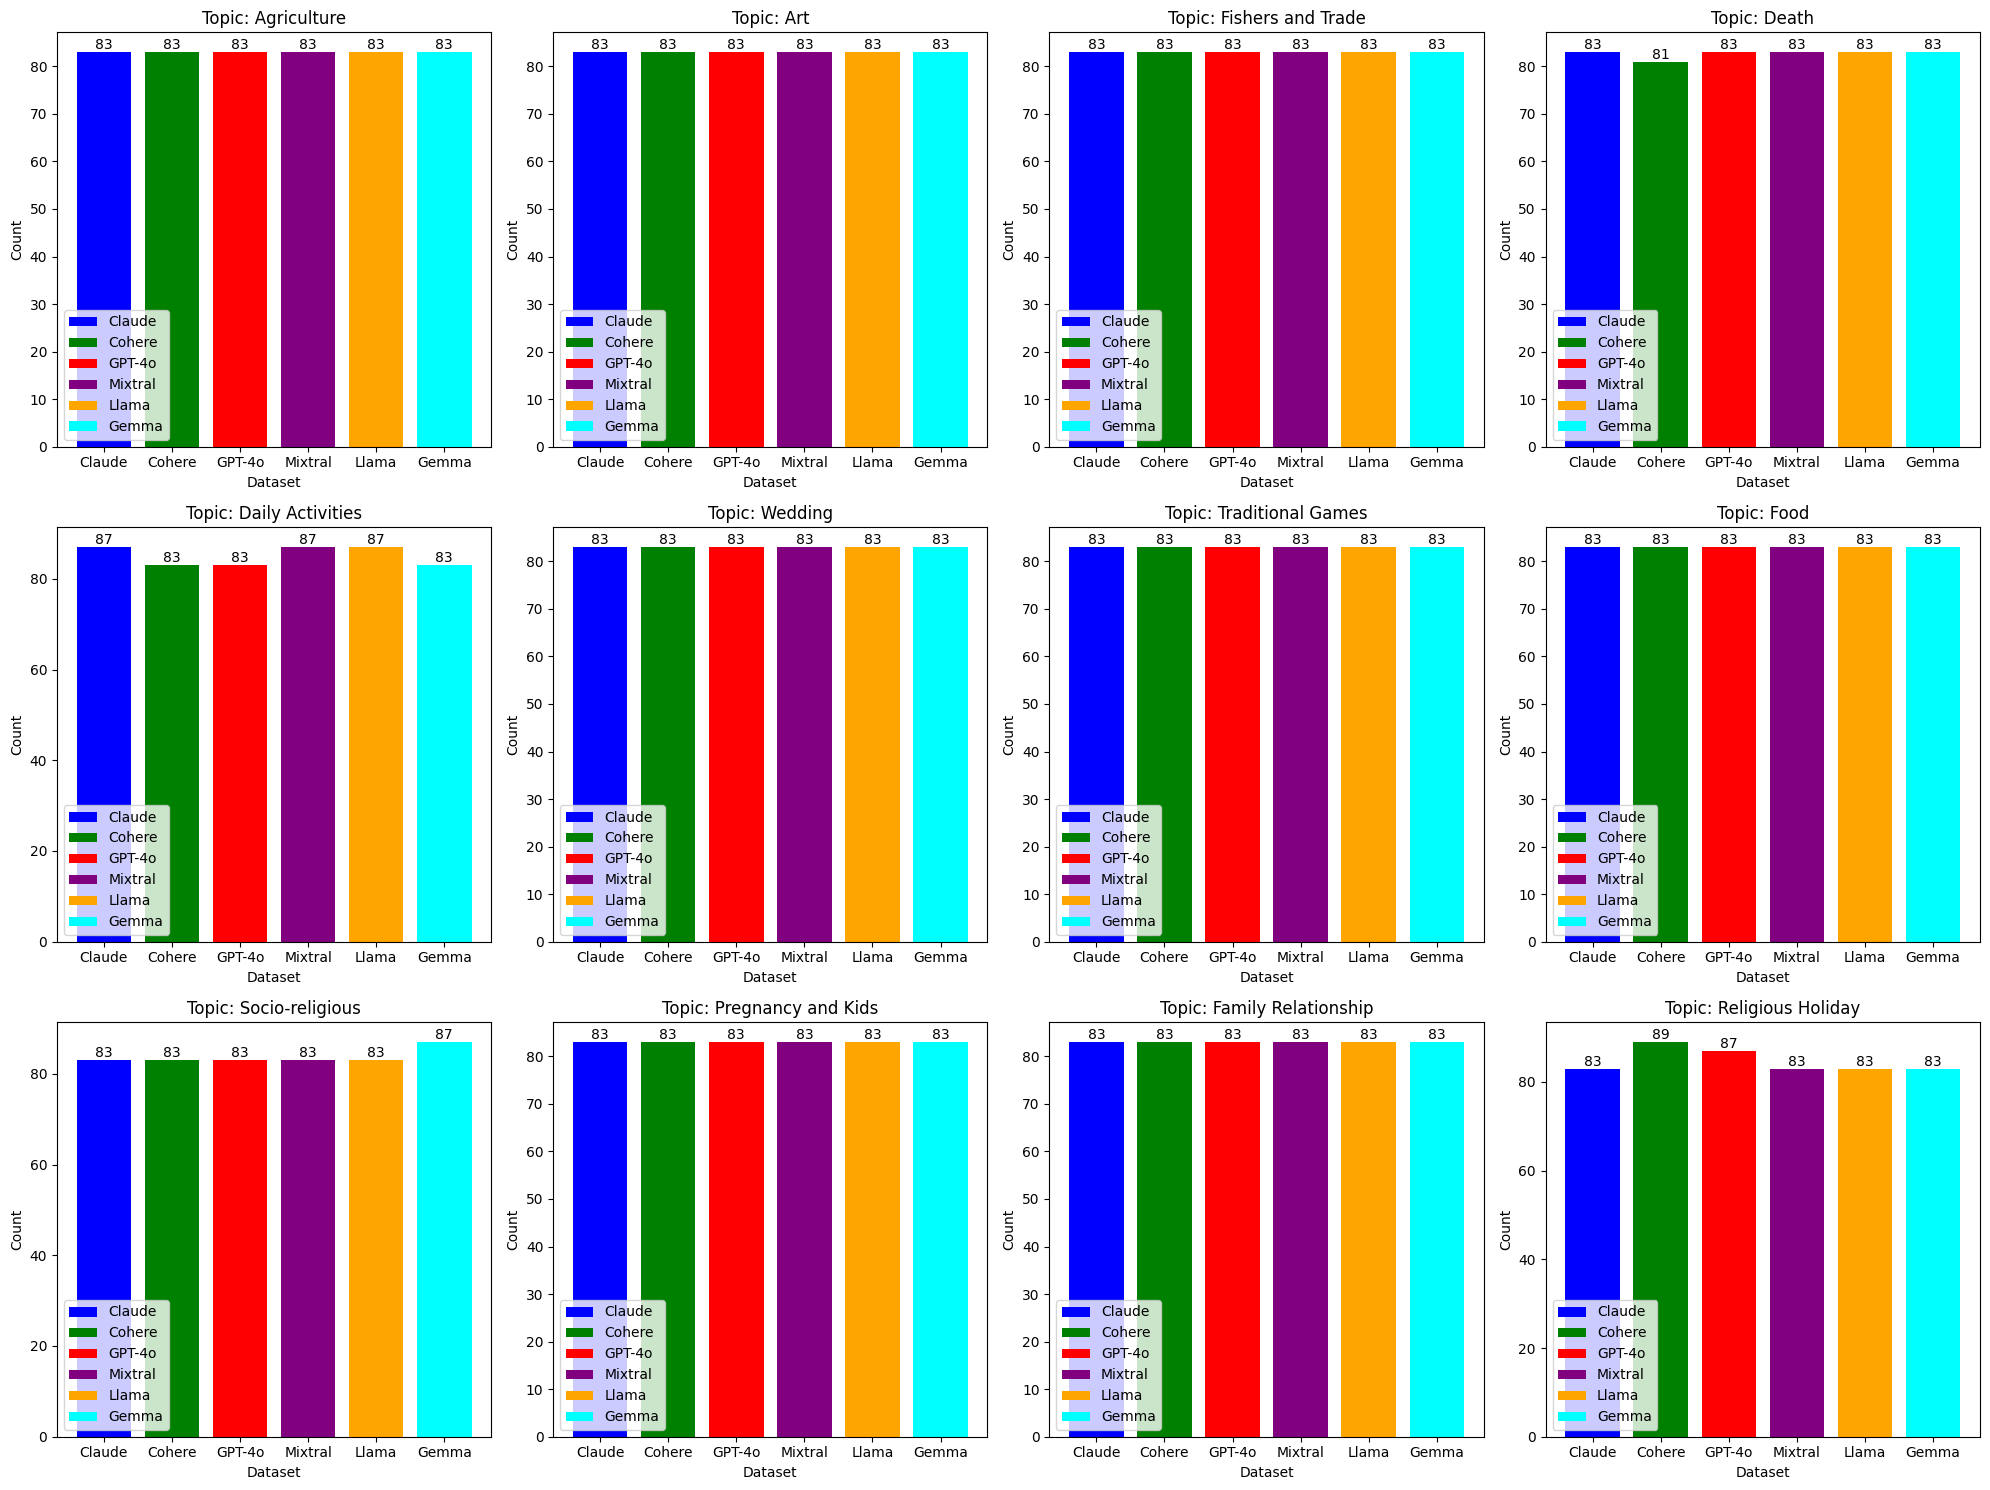

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define your DataFrames
dataframes = {
    'Claude': balancing_claude,
    'Cohere': balancing_cohere,
    'GPT-4o': balancing_gpt4o,
    'Mixtral': balancing_mixtral,
    'Llama': balancing_llama,
    'Gemma': balancing_gemma
}

# Combine topic counts for all DataFrames
all_topics = set()

# Collect all unique topics across DataFrames
for df_ in dataframes.values():
    all_topics.update(df_['topic'].unique())

# Print counts for each topic
for topic in sorted(all_topics):
    print(f"For {topic}:")
    for label, df_ in dataframes.items():
        count = df_[df_['topic'] == topic].shape[0]
        print(f"{label}: {count}")
    print()

# Set up the figure and axes
fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # Adjust figure size as needed
axs = axs.flatten()  # Flatten the 2D array of axes to make it easier to iterate

# Colors for each DataFrame
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

# Plot each topic in separate subplots
for i, topic in enumerate(df['topic'].unique()):
    for j, (label, df_) in enumerate(dataframes.items()):
        topic_counts = df_[df_['topic'] == topic].shape[0]
        bars = axs[i].bar(label, topic_counts, color=colors[j], label=label)
        
        # Annotate the bar with the count
        for bar in bars:
            yval = bar.get_height()
            axs[i].text(
                bar.get_x() + bar.get_width() / 2, 
                yval, 
                int(yval), 
                ha='center', 
                va='bottom'
            )

    axs[i].set_title(f'Topic: {topic}')
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel('Dataset')
    axs[i].legend(loc='best')

# Adjust layout
plt.tight_layout()
plt.show()

In [170]:
# Save each DataFrame to a CSV file
for name, df in dataframes.items():
    file_path = f'data_ira/balanced_{name}.csv'
    df.to_csv(file_path, index=False)
    print(f"Saved {name} DataFrame to {file_path}")

Saved Claude DataFrame to data_ira/balanced_Claude.csv
Saved Cohere DataFrame to data_ira/balanced_Cohere.csv
Saved GPT-4o DataFrame to data_ira/balanced_GPT-4o.csv
Saved Mixtral DataFrame to data_ira/balanced_Mixtral.csv
Saved Llama DataFrame to data_ira/balanced_Llama.csv
Saved Gemma DataFrame to data_ira/balanced_Gemma.csv


In [14]:
balancing_mixtral.to_csv('data_ira/balanced_Mixtral.csv', index=False)

In [42]:
import pandas as pd
import random

# File paths for the balanced files
file_paths = {
    'balanced_Claude': 'data_ira/balanced_Claude.csv',
    'balanced_Cohere': 'data_ira/balanced_Cohere.csv',
    'balanced_Gemma': 'data_ira/balanced_Gemma.csv',
    'balanced_GPT-4o': 'data_ira/balanced_GPT-4o.csv',
    'balanced_Llama': 'data_ira/balanced_Llama.csv',
    'balanced_Mixtral': 'data_ira/balanced_Mixtral.csv'
}

# Function to sample 4 rows per topic and add 2 extra random rows to make 50
def sample_data(file_path, n_per_topic=4, total_samples=50, excluded_indices=set()):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Step 1: Preserve the original index
    df = df.reset_index(drop=False)  # Preserve original index
    df = df.rename(columns={'index': 'orig_index'})  # Store original indices
    
    # Step 2: Sample 4 rows per topic, excluding already used rows
    sampled_df = df[~df['orig_index'].isin(excluded_indices)].groupby('topic').apply(
        lambda x: x.sample(n=min(len(x), n_per_topic), random_state=42)).reset_index(drop=True)
    
    # Step 3: Exclude already sampled rows, and randomly add additional rows to make total_samples
    remaining_df = df[~df['orig_index'].isin(sampled_df['orig_index'])]  # Exclude sampled rows
    if len(sampled_df) < total_samples:
        remaining_rows_needed = total_samples - len(sampled_df)
        additional_samples = remaining_df.sample(n=remaining_rows_needed, random_state=42)
        sampled_df = pd.concat([sampled_df, additional_samples]).reset_index(drop=True)
    
    # Track the original indices of the rows sampled
    used_indices = sampled_df['orig_index'].tolist()  # Track original indices
    
    # Add empty columns for fluency, coherency, correctness, and cultural relevance
    sampled_df['fluency'] = ''
    sampled_df['coherency'] = ''
    sampled_df['correctness'] = ''
    sampled_df['cultural_relevance'] = ''
    
    # Drop the 'orig_index' column as it was only used for tracking
    sampled_df = sampled_df.drop(columns=['orig_index'])
    
    return sampled_df, used_indices

# Sampling for both annotators without overlap
for name, path in file_paths.items():
    # First annotator's sampling
    annotator_1_df, annotator_1_used_indices = sample_data(path, n_per_topic=4, total_samples=50)
    annotator_1_df.to_csv(f'data_ira/sample_{name}_annotator1.csv', index=False)
    print(f"Sampled data for annotator 1 from {name} saved to 'data_ira/sample_{name}_annotator1.csv'.")
    
    # Second annotator's sampling excluding rows used by annotator 1
    annotator_2_df, annotator_2_used_indices = sample_data(path, n_per_topic=4, total_samples=50, excluded_indices=set(annotator_1_used_indices))
    annotator_2_df.to_csv(f'data_ira/sample_{name}_annotator2.csv', index=False)
    print(f"Sampled data for annotator 2 from {name} saved to 'data_ira/sample_{name}_annotator2.csv'.")
    
    # # Display the distribution of the 'topic' column for both annotators
    # print(f"\nTopic distribution for annotator 1 ({name}):")
    # print(annotator_1_df.groupby(['topic']).size().reset_index(name='counts'))
    
    # print(f"\nTopic distribution for annotator 2 ({name}):")
    # print(annotator_2_df.groupby(['topic']).size().reset_index(name='counts'))

# Function to compare two CSV files and check if there are any overlapping rows
def check_overlap(file_annotator1, file_annotator2, columns_to_check):
    # Read both files into DataFrames
    df1 = pd.read_csv(file_annotator1)
    df2 = pd.read_csv(file_annotator2)
    
    # Select only the specified columns for comparison
    df1_subset = df1[columns_to_check]
    df2_subset = df2[columns_to_check]
    
    # Merge the two DataFrames to find overlapping rows
    merged_df = pd.merge(df1_subset, df2_subset, on=columns_to_check, how='inner')
    
    # Count the number of overlapping rows
    overlap_count = len(merged_df)
    
    # If the merged DataFrame is empty, there are no overlapping rows
    if merged_df.empty:
        print("No overlapping rows found between the two annotators.")
    else:
        print(f"{overlap_count} overlapping rows found between the two annotators:")
        print(merged_df)
        
# List of columns to check for overlap
columns_to_check = [
    'topic', 'kalimat_1', 'kalimat_2', 'kalimat_3', 'kalimat_4',
    'correct_ending', 'incorrect_ending'
]

# Example check for overlap
for name in file_paths.keys():
    file_annotator1 = f'data_ira/sample_{name}_annotator1.csv'
    file_annotator2 = f'data_ira/sample_{name}_annotator2.csv'
    print(f"\nChecking overlap for {name}:")
    check_overlap(file_annotator1, file_annotator2, columns_to_check)

Sampled data for annotator 1 from balanced_Claude saved to 'data_ira/sample_balanced_Claude_annotator1.csv'.
Sampled data for annotator 2 from balanced_Claude saved to 'data_ira/sample_balanced_Claude_annotator2.csv'.
Sampled data for annotator 1 from balanced_Cohere saved to 'data_ira/sample_balanced_Cohere_annotator1.csv'.
Sampled data for annotator 2 from balanced_Cohere saved to 'data_ira/sample_balanced_Cohere_annotator2.csv'.
Sampled data for annotator 1 from balanced_Gemma saved to 'data_ira/sample_balanced_Gemma_annotator1.csv'.
Sampled data for annotator 2 from balanced_Gemma saved to 'data_ira/sample_balanced_Gemma_annotator2.csv'.
Sampled data for annotator 1 from balanced_GPT-4o saved to 'data_ira/sample_balanced_GPT-4o_annotator1.csv'.
Sampled data for annotator 2 from balanced_GPT-4o saved to 'data_ira/sample_balanced_GPT-4o_annotator2.csv'.
Sampled data for annotator 1 from balanced_Llama saved to 'data_ira/sample_balanced_Llama_annotator1.csv'.
Sampled data for annotato

/var/folders/8_/tf0673cx53j_z_bhct0txv5r0000gn/T/ipykernel_76130/920996121.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df[~df['orig_index'].isin(excluded_indices)].groupby('topic').apply(
/var/folders/8_/tf0673cx53j_z_bhct0txv5r0000gn/T/ipykernel_76130/920996121.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df[~df['orig_index'].isin(excluded_indices)].groupby('topic

In [47]:
import pandas as pd
import os

# Path to the directory containing your _annotator1 files
directory_path = 'data_ira/'
name = '_annotator2'
# Create a new Excel writer object
with pd.ExcelWriter(f'combined{name}_files.xlsx', engine='openpyxl') as writer:
    # Loop through each file in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(f'{name}.csv'):
            # Read the CSV file into a DataFrame
            file_path = os.path.join(directory_path, filename)
            df = pd.read_csv(file_path)
            
            # Use the filename (without extension) as the sheet name
            sheet_name = os.path.splitext(filename)[0]
            
            # Write the DataFrame to a specific sheet
            df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"All files combined into combined{name}_files.xlsx")


All files combined into combined_annotator2_files.xlsx


/Users/irasalsabila/Library/Python/3.9/lib/python/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
/Users/irasalsabila/Library/Python/3.9/lib/python/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
/Users/irasalsabila/Library/Python/3.9/lib/python/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
/Users/irasalsabila/Library/Python/3.9/lib/python/site-packages/openpyxl/workbook/child.py:99: UserWarning: T

,topic,kalimat_1,kalimat_2,kalimat_3,kalimat_4,correct_ending,incorrect_ending,fluency,coherency,correctness,cultural_relevance
0,Agriculture,Parman lan kanca-kancane nandur cabai,Cabai butuh perawatan khusus kanggo bisa tuwuh...,"Saben dina, Parman nyemprot cabai nganggo pupu...",Dheweke uga ngresiki suket sing ngganggu,Cabai Parman dadi lemu-lemu lan regane regane ...,Parman kesel amarga cabai ora tuwuh subur.,NaN,NaN,NaN,NaN
1,Agriculture,"Setiap musim panen, Pak Budi nganakake syukura...",Warga desa padha kumpul lan mangan bersama,Pak Budi percaya yen syukuran iki nggawa berka...,Tradisi iki wis dilakoni turun temurun,Panen Pak Budi terus melimpah lan warga desa p...,Panen Pak Budi gagal lan warga desa kecewa.,NaN,NaN,NaN,NaN


/var/folders/8_/tf0673cx53j_z_bhct0txv5r0000gn/T/ipykernel_76130/3370960366.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=combined_data, x='topic', order=combined_data['topic'].value_counts().index, palette='Set2')


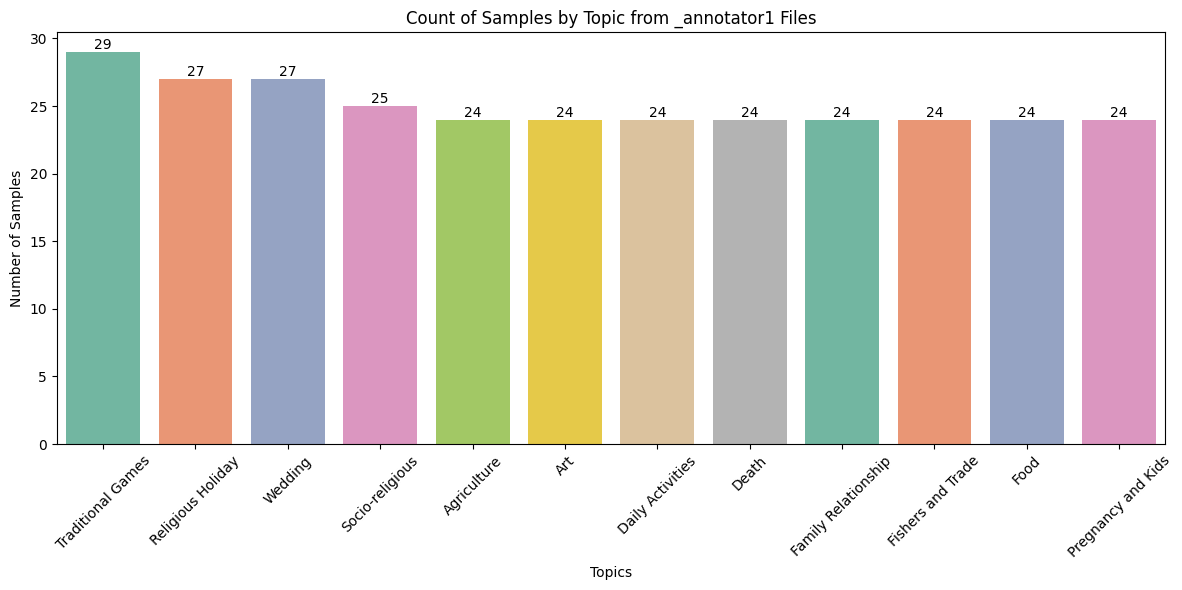

In [53]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the directory containing your _annotator1 files
directory_path = 'data_ira'

# Create an empty DataFrame to store combined data
combined_data = pd.DataFrame()

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('_annotator1.csv'):
        # Read the CSV file into a DataFrame
        file_path = os.path.join(directory_path, filename)
        # print(file_path)
        df = pd.read_csv(file_path)

        # Assuming there's a 'topic' column to categorize data
        combined_data = pd.concat([combined_data, df], ignore_index=True)

# Check the combined data
display(combined_data.head(2))

# Visualize the data based on topics
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=combined_data, x='topic', order=combined_data['topic'].value_counts().index, palette='Set2')

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.title('Count of Samples by Topic from _annotator1 Files')
plt.xticks(rotation=45)
plt.xlabel('Topics')
plt.ylabel('Number of Samples')
plt.tight_layout()
plt.show()

,topic,kalimat_1,kalimat_2,kalimat_3,kalimat_4,correct_ending,incorrect_ending,fluency,coherency,correctness,cultural_relevance,annotator
0,Agriculture,Mas Seno duwe kebun sayur organik,"Saben kali panen, Mas Seno mesthi ngajak bocah...",Dheweke uga ngajari cara nandur lan ngrawat ta...,Mas Seno percaya yen pendidikan tetanen pentin...,Bocah-bocah dadi paham tetanen lan kebon Mas S...,Bocah-bocah ora seneng lan kebon Mas Seno tete...,NaN,NaN,NaN,NaN,Annotator 2
1,Agriculture,Keluarga Pak Darto duwe kebiasaan unik nalika ...,"Saben panen, dheweke nganakake upacara slameta...",Para tetangga lan sanak sedulur diundang kangg...,"Sawise upacara, kabeh padha mangan bebarengan",Kabeh warga seneng lan ngrasa syukur bareng-ba...,"Sawise upacara, kabeh langsung bali menyang om...",NaN,NaN,NaN,NaN,Annotator 2


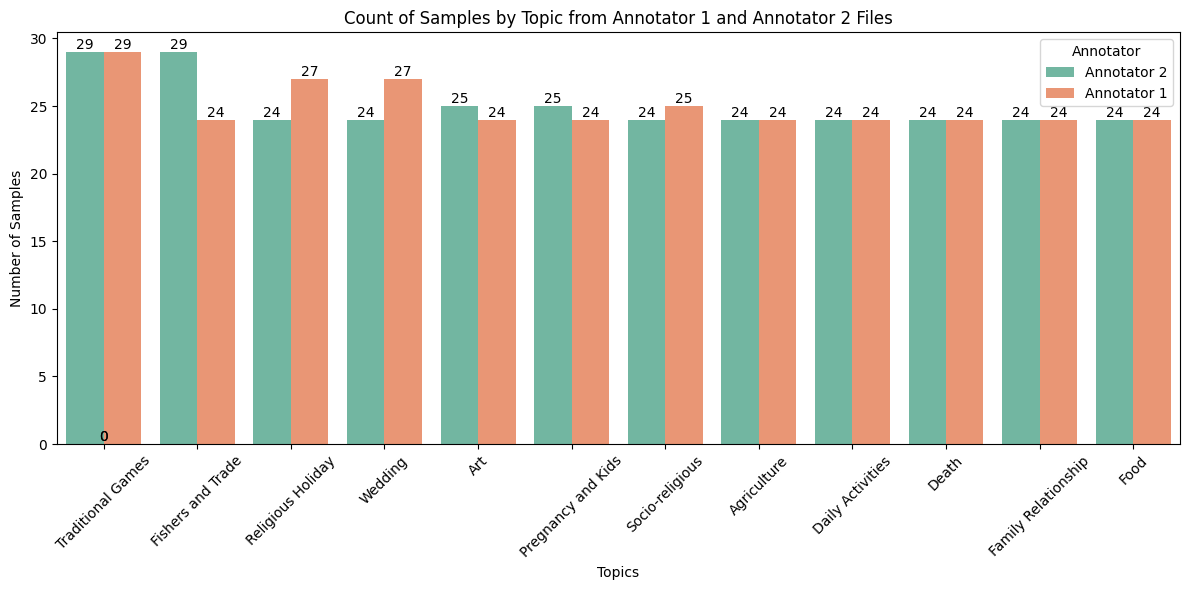

In [54]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the directory containing your files
directory_path = 'data_ira'

# Create an empty DataFrame to store combined data
combined_data = pd.DataFrame()

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('_annotator1.csv'):
        # Read the _annotator1 file into a DataFrame
        file_path = os.path.join(directory_path, filename)
        df = pd.read_csv(file_path)
        df['annotator'] = 'Annotator 1'  # Add a column to identify the annotator
        combined_data = pd.concat([combined_data, df], ignore_index=True)
    elif filename.endswith('_annotator2.csv'):
        # Read the _annotator2 file into a DataFrame
        file_path = os.path.join(directory_path, filename)
        df = pd.read_csv(file_path)
        df['annotator'] = 'Annotator 2'  # Add a column to identify the annotator
        combined_data = pd.concat([combined_data, df], ignore_index=True)

# Check the combined data
display(combined_data.head(2))

# Visualize the data based on topics and annotators
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=combined_data, x='topic', hue='annotator', 
                   order=combined_data['topic'].value_counts().index, palette='Set2')

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.title('Count of Samples by Topic from Annotator 1 and Annotator 2 Files')
plt.xticks(rotation=45)
plt.xlabel('Topics')
plt.ylabel('Number of Samples')
plt.legend(title='Annotator')
plt.tight_layout()
plt.show()


train_gpt4o_jv.pkl
cleaned_train_gemmaF_jv.csv
train_mixtralF_jv.csv
cleaned_train_mixtra2_jv.csv
train_mixtral_jv.pkl
sample_llama.csv
cleaned_train_mixtral_jv.csv
train_gemma3_jv.csv
cleaned_train_claude_jv.csv
train_cohere_jv.csv
sample_gemma.csv
balanced_Claude.csv
sample_claude.csv
train_mixtral2_jv.csv
train_gemma2_jv.pkl
combined_annotator2_files.xlsx
train_claude_jv.pkl
train_llama_jv.pkl
train_gemma_jv.pkl
train_cohere_jv.pkl
balanced_Cohere.csv
cleaned_train_gemma_jv.csv
combined_annotator1_files.xlsx
sample_gpt.csv
cleaned_train_llama_jv.csv
sample_cohere.csv
sample_mixtral.csv
train_mixtral2_jv.pkl
train_gemma2_jv.csv
balanced_Gemma.csv
cleaned_train_cohere_jv.csv
train_llama_jv.csv
train_claude_jv.csv
balanced_Mixtral.csv
train_gemma_jv.csv
train_gpt4o_jv.csv
cleaned_train_gemma3_jv.csv
cleaned_train_mixtralF_jv.csv
balanced_Llama.csv
balanced_GPT-4o.csv
train_gemmaF_jv.csv
train_mixtral_jv.csv
train_gemma3_jv.pkl
cleaned_train_gpt4o_jv.csv


,topic,kalimat_1,kalimat_2,kalimat_3,kalimat_4,correct_ending,incorrect_ending,fluency,coherency,correctness,cultural_relevance
0,Agriculture,Wahyu kepingin dadi wong tani sing sukses,Wahyu kudu njaga sawah supaya ora kegempel,Wahyu ora pengin gagal,Wahyu kepingin nglairake tradisi nandur pari i...,"Ayu lan kanca-kancane nglakoni upacara ""syukur...","Wahyu ora nglakoni upacara ""selamatan"" kanggo ...",NaN,NaN,NaN,NaN
1,Agriculture,Kori kancane arep nandur pari,Kori kancane ora tahu cara nandur pari,Kori kancane butuh bantuan,Kori nandur pari bareng kancane,Kori lan kancane nandur pari bareng.,Kori nandur pari dhewe.,NaN,NaN,NaN,NaN


/var/folders/8_/tf0673cx53j_z_bhct0txv5r0000gn/T/ipykernel_76130/1023983466.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=combined_data, x='topic', order=combined_data['topic'].value_counts().index, palette='Set2')


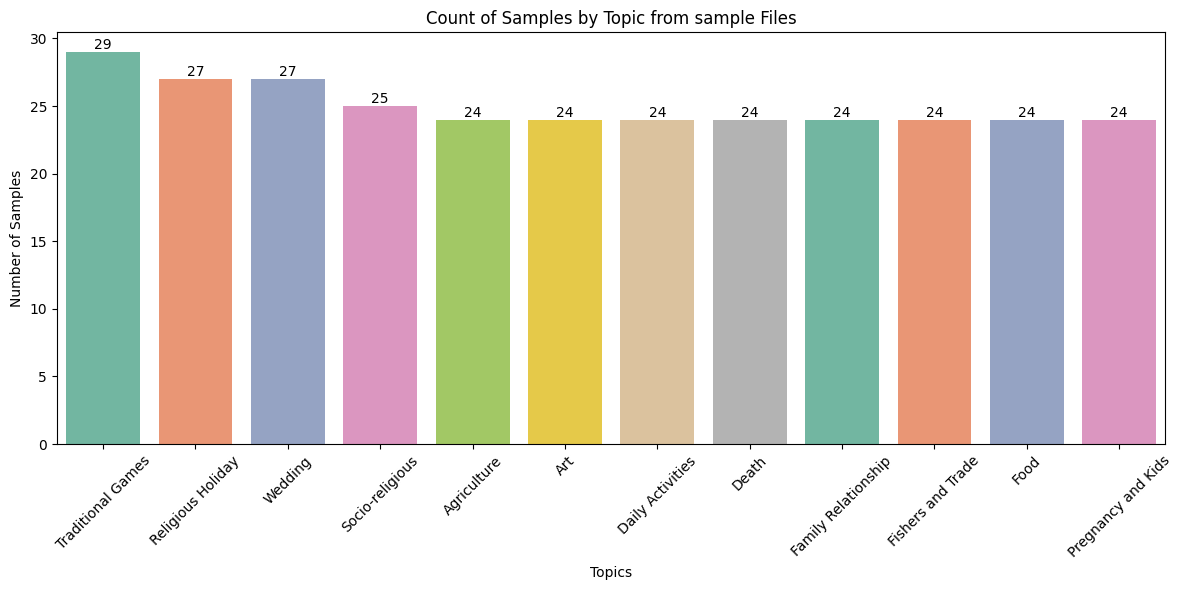

In [65]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the directory containing your _annotator1 files
directory_path = 'data_ira'

# Create an empty DataFrame to store combined data
combined_data = pd.DataFrame()

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    print(filename)
    if filename.startswith('sample_') and filename.endswith('.csv'):
        # Read the CSV file into a DataFrame
        file_path = os.path.join(directory_path, filename)
        # print(file_path)
        df = pd.read_csv(file_path)

        # Assuming there's a 'topic' column to categorize data
        combined_data = pd.concat([combined_data, df], ignore_index=True)

# Check the combined data
display(combined_data.head(2))
# print('a')
# print(combined_data.head(2))

# Visualize the data based on topics
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=combined_data, x='topic', order=combined_data['topic'].value_counts().index, palette='Set2')

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.title('Count of Samples by Topic from sample Files')
plt.xticks(rotation=45)
plt.xlabel('Topics')
plt.ylabel('Number of Samples')
plt.tight_layout()
plt.show()

In [1]:
print('hellow')

hellow
